In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib
import random
import cv2
import warnings
warnings.filterwarnings("ignore")

In [2]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [3]:
data_dir = "C:/Users/divya/Downloads/PRCP-1001-RiceLeaf"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/divya/Downloads/PRCP-1001-RiceLeaf')

In [4]:
list(data_dir.glob(".jpg"))

[]

In [5]:
bacteria = list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

In [6]:
brown_spot = list(data_dir.glob("Brown spot/*"))
len(brown_spot)

40

In [7]:
smut = list(data_dir.glob("Leaf smut/*"))
len(smut)

39

**Visualization**

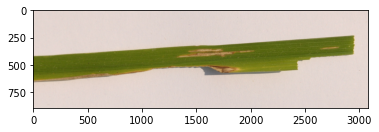

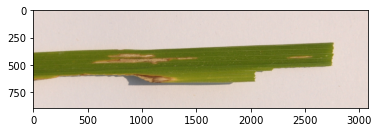

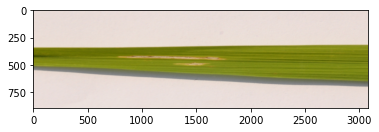

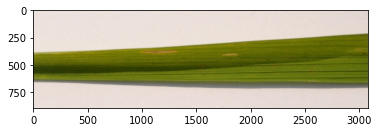

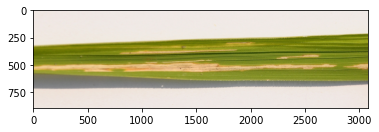

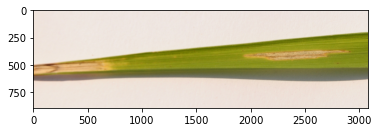

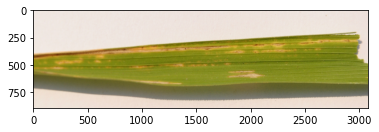

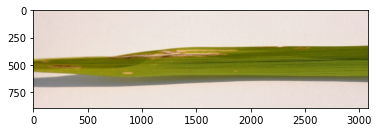

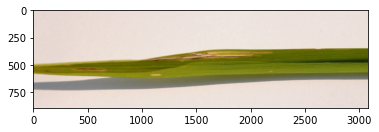

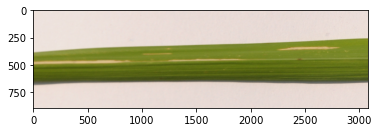

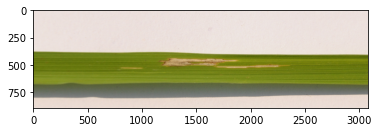

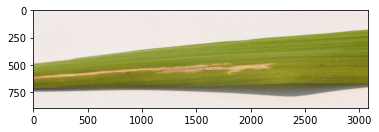

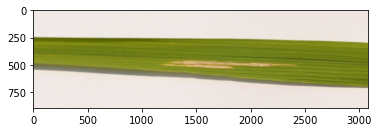

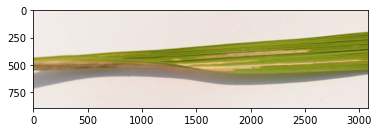

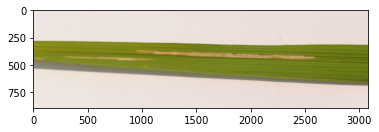

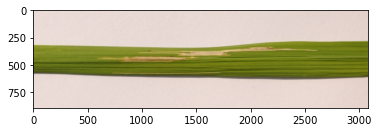

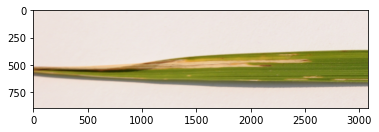

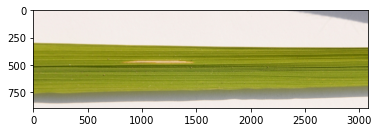

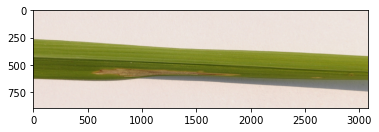

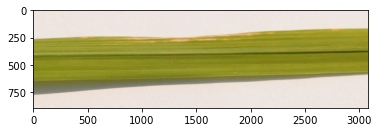

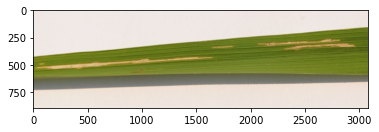

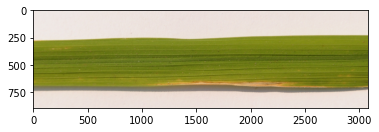

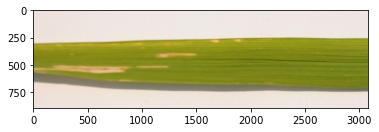

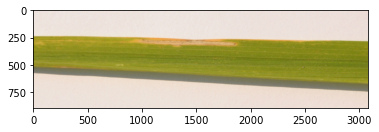

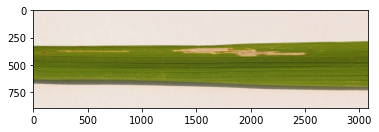

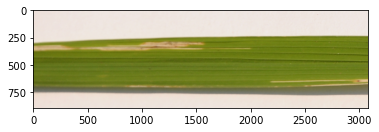

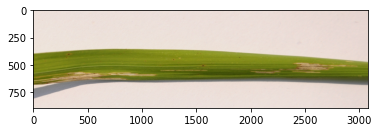

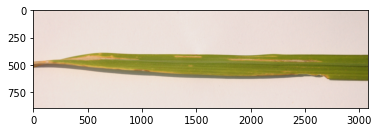

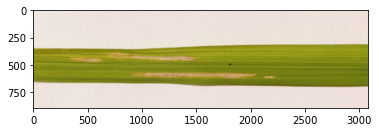

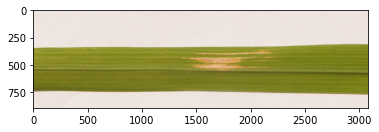

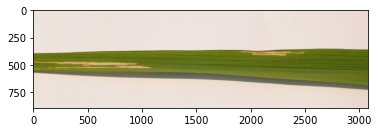

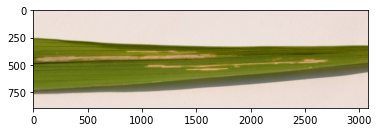

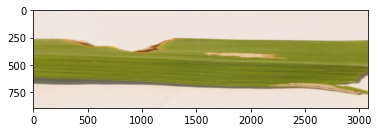

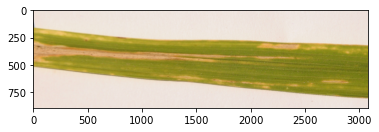

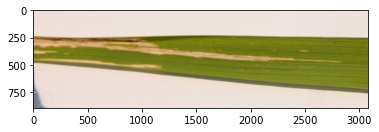

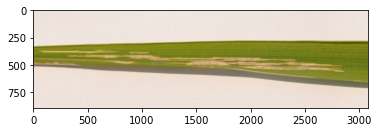

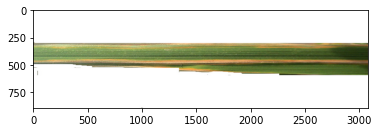

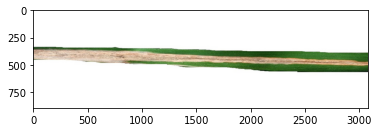

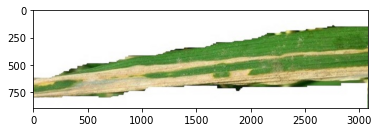

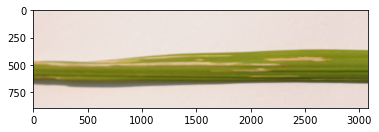

In [8]:
# Displaying Bacterial leaf blight images
def process(filename):
    image = mpimg.imread(filename)
    plt.imshow(image)
    plt.show()
    
for file in bacteria:
    process(file)

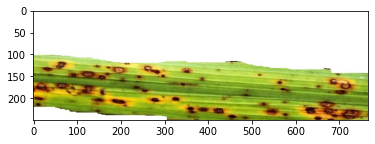

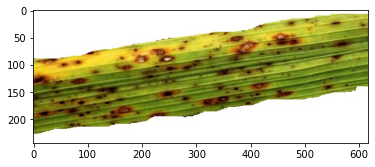

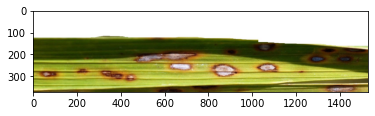

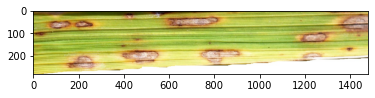

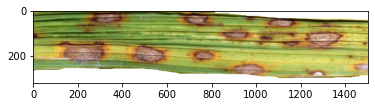

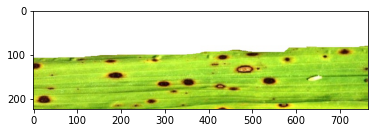

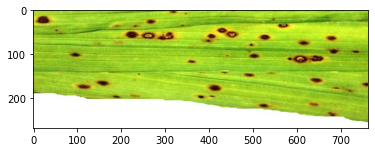

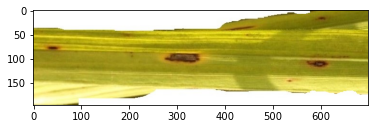

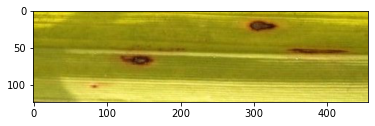

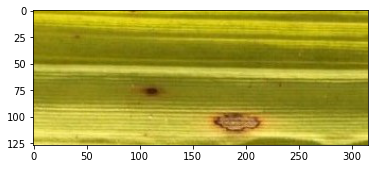

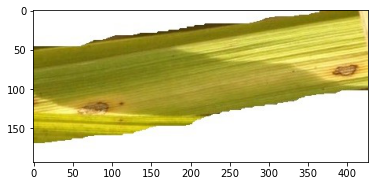

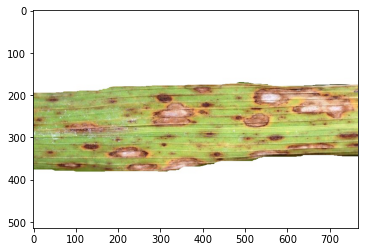

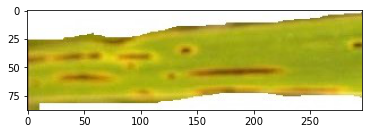

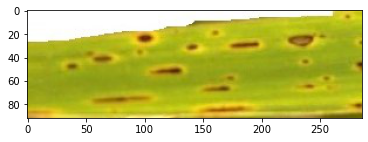

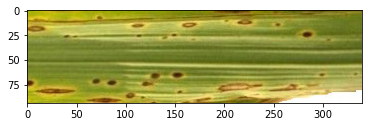

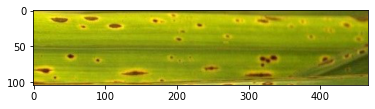

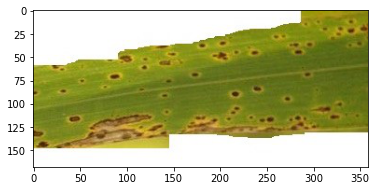

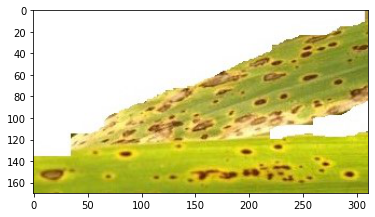

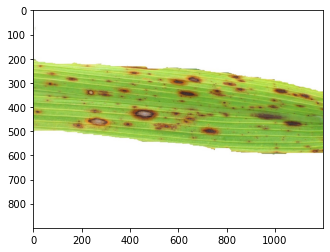

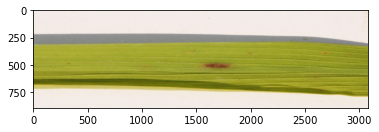

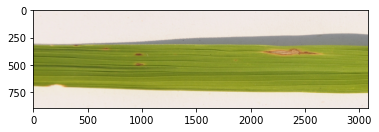

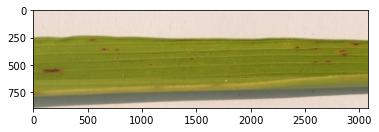

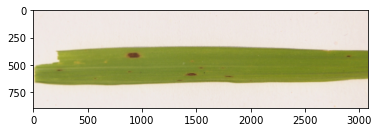

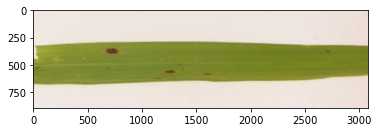

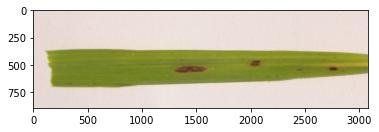

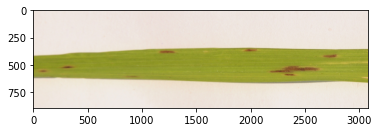

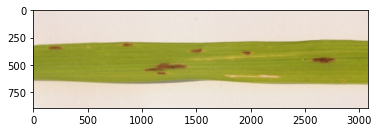

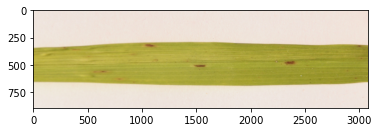

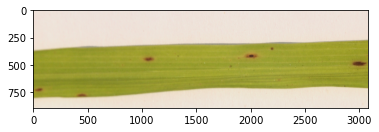

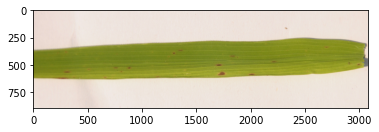

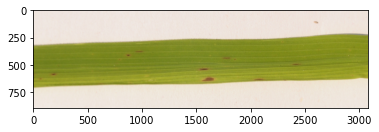

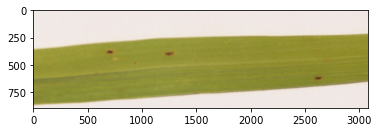

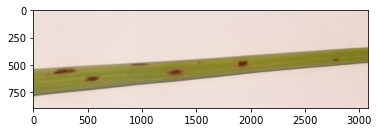

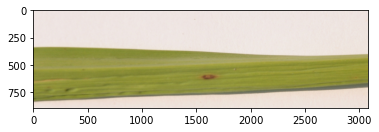

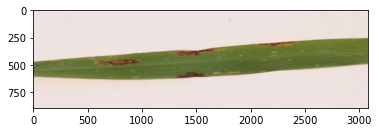

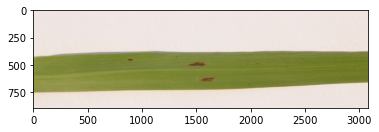

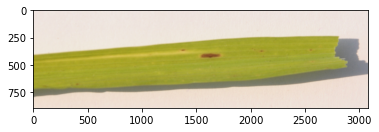

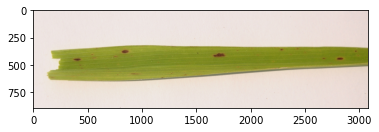

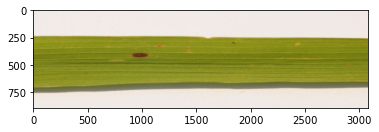

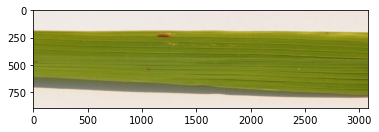

In [9]:
# Displaying Brown spots images
for file in brown_spot:
    process(file)

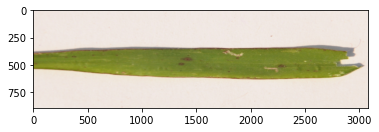

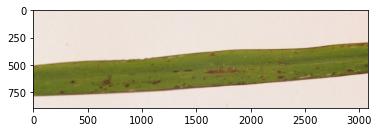

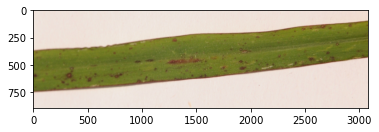

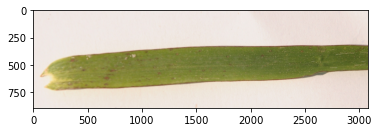

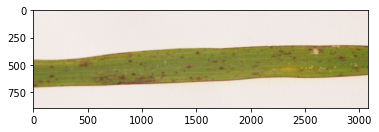

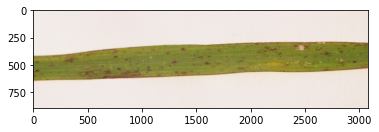

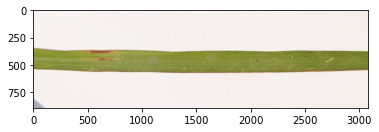

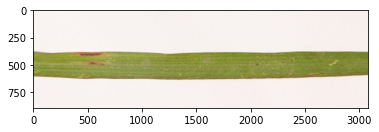

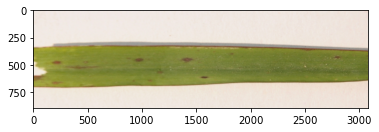

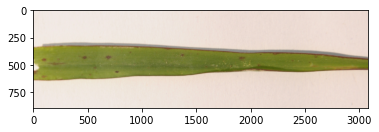

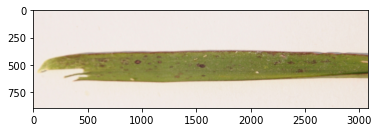

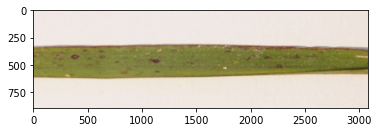

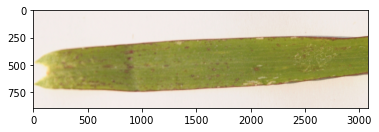

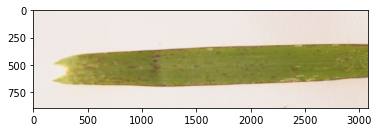

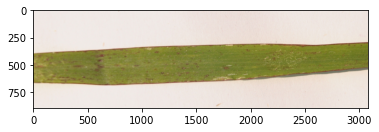

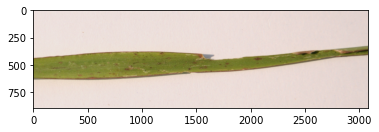

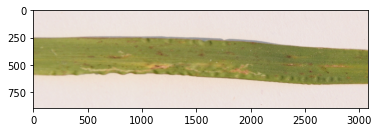

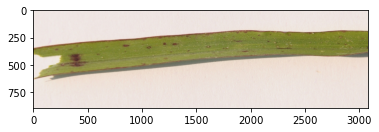

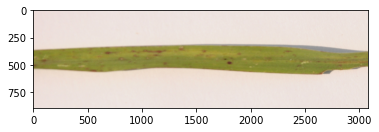

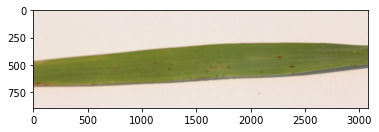

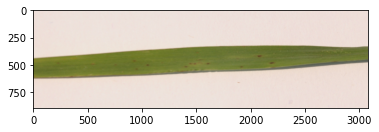

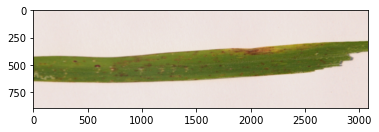

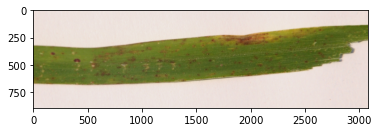

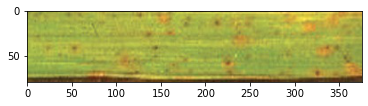

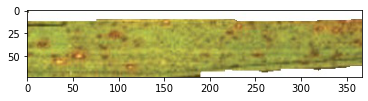

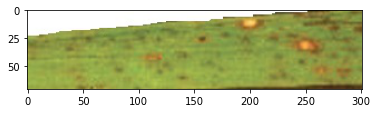

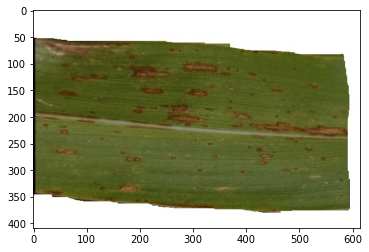

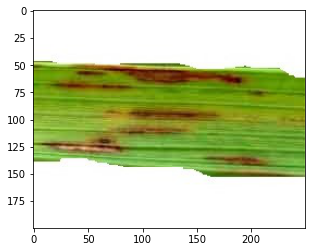

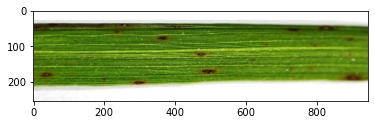

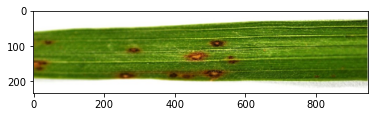

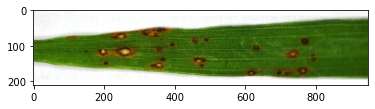

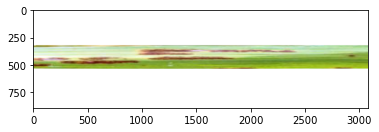

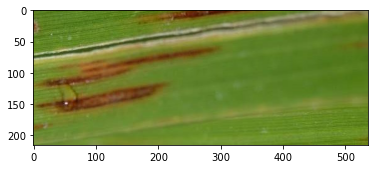

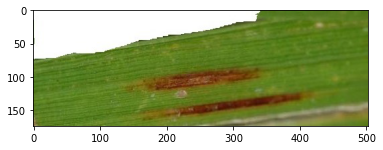

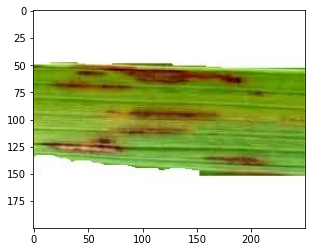

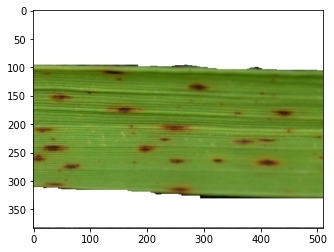

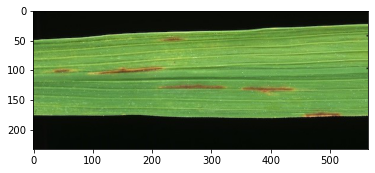

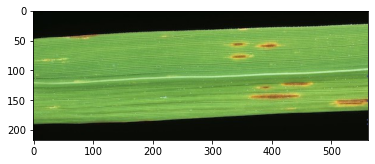

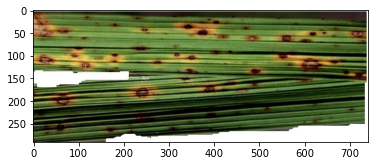

In [10]:
# Displaying Leaf smut images
for file in smut:
    process(file)

In [11]:
# Creating a dictionary for the folders in Rice leaf directory
dict = {"bacteria":list(data_dir.glob("Bacterial leaf blight/*")), "brown_spot":list(data_dir.glob("Brown spot/*")), 
        "smut":list(data_dir.glob("Leaf smut/*"))}
label = {'bacteria':0, 'brown_spot':1, 'smut':2}

In [12]:
# Reading the images and identifying dependent and independent variables
x, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        re_img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_CUBIC)
        x.append(re_img)
        y.append(label[name])

**Splitting the dataset into Train, Test and Validation sets**

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow import keras

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

# Converting to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Rescaling the Images by dividing every pixel in every image by 255
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

num_classes = len(np.unique(y_train))
print(len(x_train), len(y_train), len(x_test), len(y_test))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Splitting images into train and validation sets
(x_train, x_valid) = x_train[20:], x_train[:20]
(y_train, y_valid) = y_train[20:], y_train[:20]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

89 89 30 30
x_train shape: (69, 224, 224, 3)
69 train samples
30 test samples
20 validation samples


**Model Architecture**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

**Compiling the model**

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Training the model**

In [16]:
from keras.callbacks import ModelCheckpoint

# training the model
checkpointer = ModelCheckpoint(filepath="model.weights.best.hdf5", verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=224, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=3, shuffle=True)


Epoch 1/30

Epoch 1: val_loss improved from inf to 1.53471, saving model to model.weights.best.hdf5
Epoch 2/30

Epoch 2: val_loss improved from 1.53471 to 1.02665, saving model to model.weights.best.hdf5
Epoch 3/30

Epoch 3: val_loss did not improve from 1.02665
Epoch 4/30

Epoch 4: val_loss did not improve from 1.02665
Epoch 5/30

Epoch 5: val_loss did not improve from 1.02665
Epoch 6/30

Epoch 6: val_loss did not improve from 1.02665
Epoch 7/30

Epoch 7: val_loss did not improve from 1.02665
Epoch 8/30

Epoch 8: val_loss did not improve from 1.02665
Epoch 9/30

Epoch 9: val_loss did not improve from 1.02665
Epoch 10/30

Epoch 10: val_loss did not improve from 1.02665
Epoch 11/30

Epoch 11: val_loss did not improve from 1.02665
Epoch 12/30

Epoch 12: val_loss did not improve from 1.02665
Epoch 13/30

Epoch 13: val_loss did not improve from 1.02665
Epoch 14/30

Epoch 14: val_loss did not improve from 1.02665
Epoch 15/30

Epoch 15: val_loss improved from 1.02665 to 0.99686, saving model

**Loading the Model with the Best Validation Accuracy**

In [17]:
model.load_weights('model.weights.best.hdf5')

**Model Evaluation**

In [18]:
train_score = model.evaluate(x_train, y_train, verbose=0)
train_accuracy = 100*train_score[1]

test_score = model.evaluate(x_test, y_test, verbose=0)
test_accuracy = 100*test_score[1]

val_score = model.evaluate(x_valid, y_valid, verbose=0)
val_accuracy = 100*val_score[1]

print("Training accuracy is:",train_accuracy,"%")
print("Test accuracy is:", test_accuracy,"%")
print("Validation accuracy is:",val_accuracy,"%")

Training accuracy is: 79.71014380455017 %
Test accuracy is: 76.66666507720947 %
Validation accuracy is: 80.0000011920929 %


**Predicting test images**

In [19]:
y_hat = model.predict(x_test)
labels = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

1/1 [==============================] - 1s 527ms/step


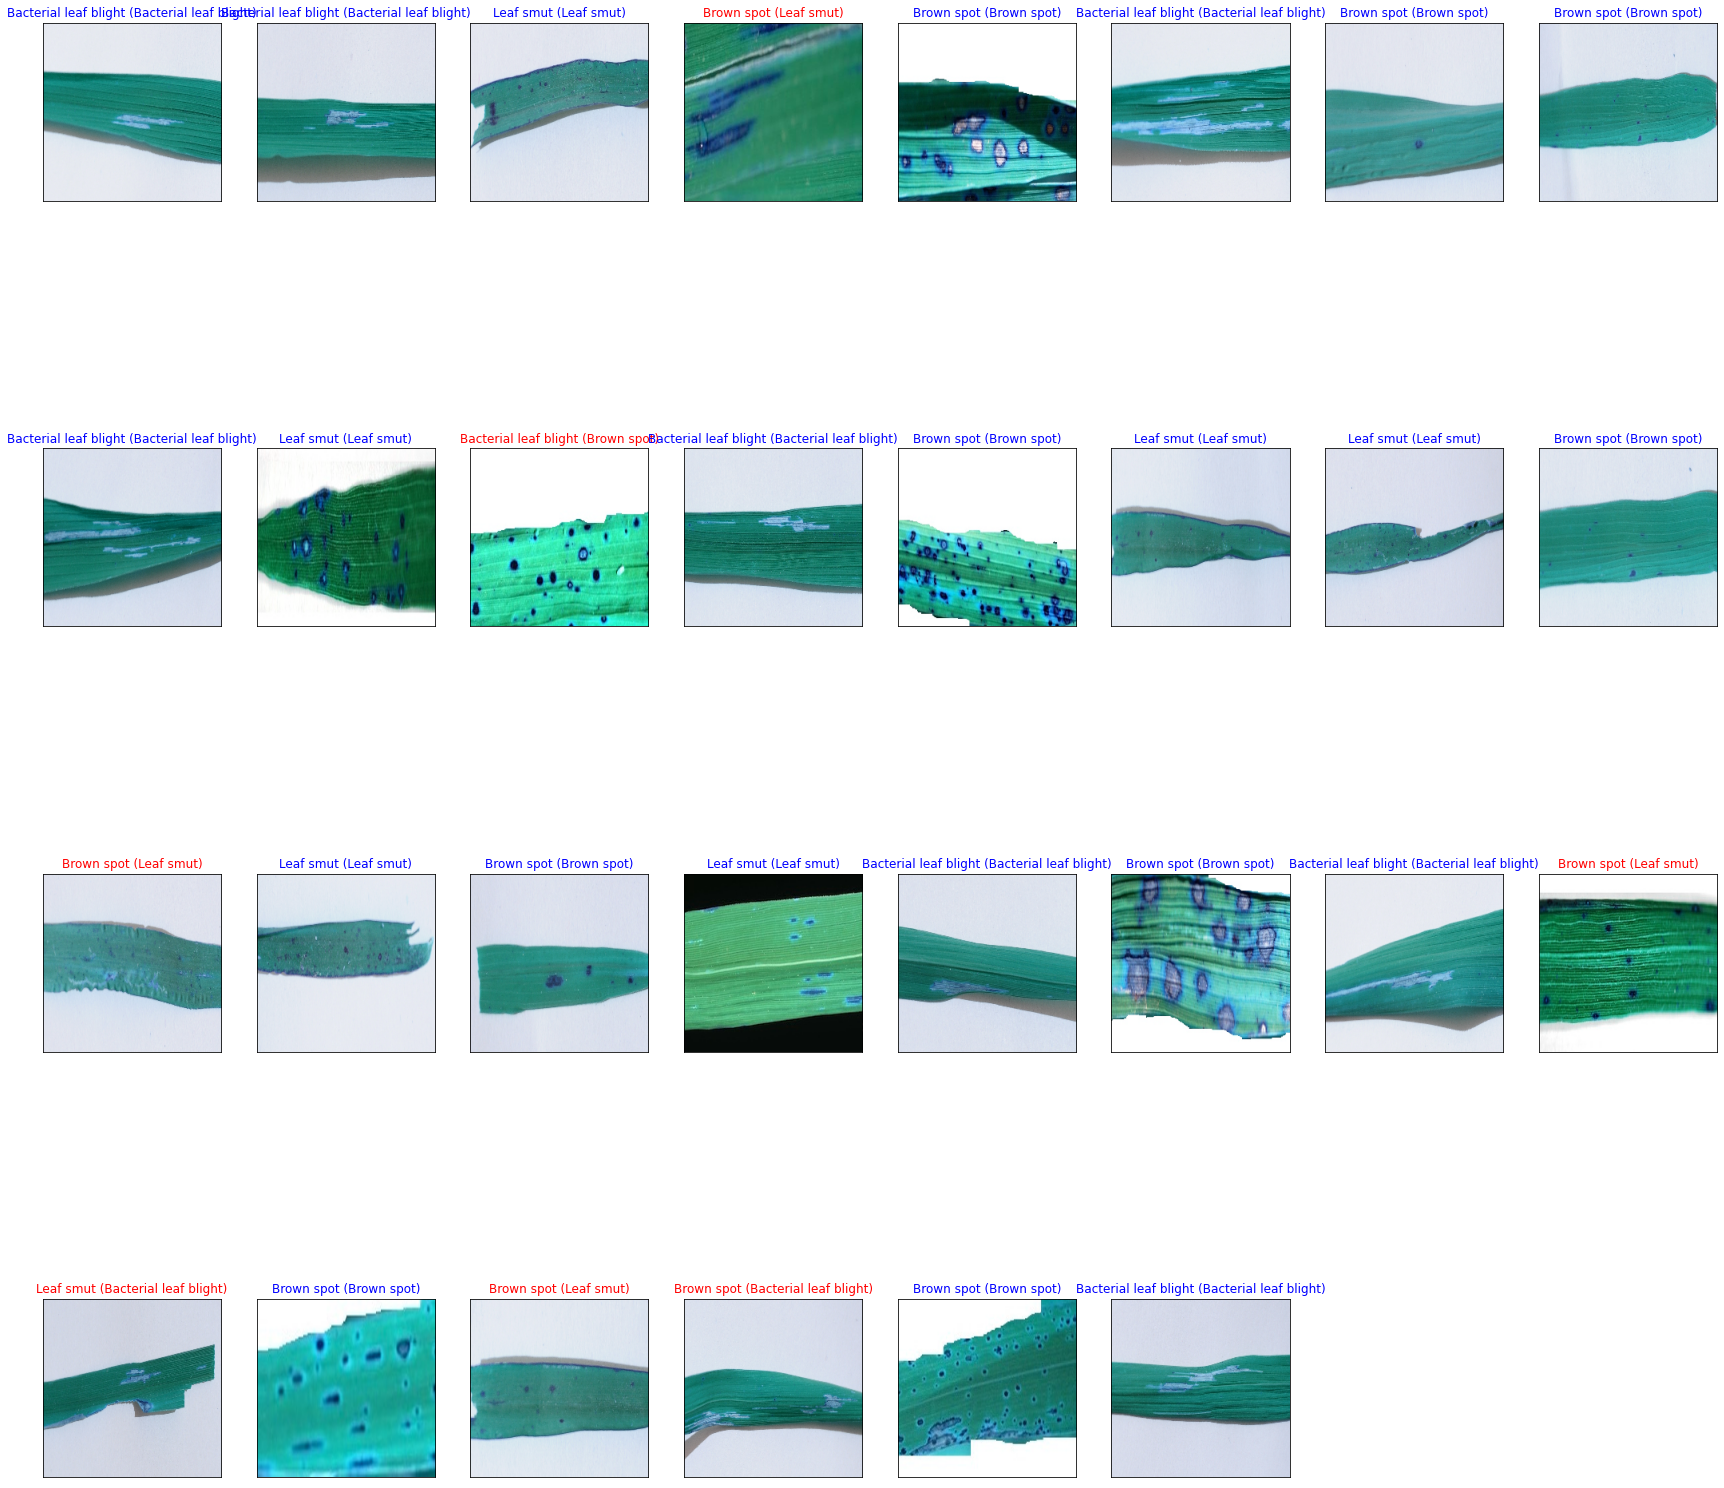

In [20]:
# ploting a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(30, 30))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=30, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

**This proposed CNN model gives 80% Training accuracy, 77% Test accuracy and validation accuracy of 80% which means that the model has generalized well**